**1- Dowloading data from kaggle**

In [1]:
#Installing kaggle in googl colab
!pip install --upgrade --ignore-installed kaggle
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 6.1 MB/s 
     |████████████████████████████████| 155 kB 31.9 MB/s 
     |████████████████████████████████| 247 kB 72.6 MB/s 
     |████████████████████████████████| 62 kB 1.9 MB/s 
     |████████████████████████████████| 78 kB 9.1 MB/s 
     |████████████████████████████████| 140 kB 76.1 MB/s 
     |████████████████████████████████| 78 kB 8.5 MB/s 
     |████████████████████████████████| 61 kB 150 kB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=8d2940310364bb5c38b5d29f5bdf6b57b190e3884749c1f7cedf504068a194f6
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency

In [2]:
#Uploading Files
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mseher","key":"09d6e5fe0cd9e32fffe8bd2ffba4b6b3"}'}

In [3]:
!mkdir ~/.kaggle #created at root folder in colab

In [4]:
#copy
!cp kaggle.json ~/.kaggle

In [5]:
 #Managing access
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                   5MB  2022-11-13 15:47:17          10896        320  1.0              
michals22/coffee-dataset                                        Coffee dataset                                    24KB  2022-12-15 20:02:12           1821         54  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                  3MB  2022-11-16 13:52:31           6815        150  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data         E-Commerce 

In [7]:
#Downloading Data
!kaggle datasets download -d puneet6060/intel-image-classification

100% 345M/346M [00:10<00:00, 38.7MB/s]
100% 346M/346M [00:10<00:00, 36.2MB/s]


In [8]:
#unzip dataset in colab session
!unzip -q intel-image-classification.zip  # -q for quiet

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# copy zipped dataset into your drive
!cp "/content/intel-image-classification.zip" /content/drive/MyDrive/

**2- Loading data**

In [11]:
#Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
import tensorflow as tf
import glob
%matplotlib inline



In [12]:
#Using GPU
tf.test.gpu_device_name()

'/device:GPU:0'

In [37]:
#Assigning path

trainpath = '/content/seg_train/seg_train'
testpath = '/content/seg_test/seg_test'
predpath = '/content/seg_pred/seg_pred'


#Reading Images from folder
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    trainpath,
    seed=123,
    batch_size=batch_size,
    image_size = (150,150)
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    testpath,
    seed=123,
    batch_size=batch_size,
    image_size = (150,150)
)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [14]:
# Checking Number of images training folder for each category

import glob as gb
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2512 in folder mountain
For training data , found 2191 in folder buildings
For training data , found 2382 in folder street
For training data , found 2404 in folder glacier
For training data , found 2271 in folder forest
For training data , found 2274 in folder sea


In [15]:
# Checking Number of images testing folder for each category

files = gb.glob(pathname= str(predpath +'/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


In [16]:
# Printing class names

class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


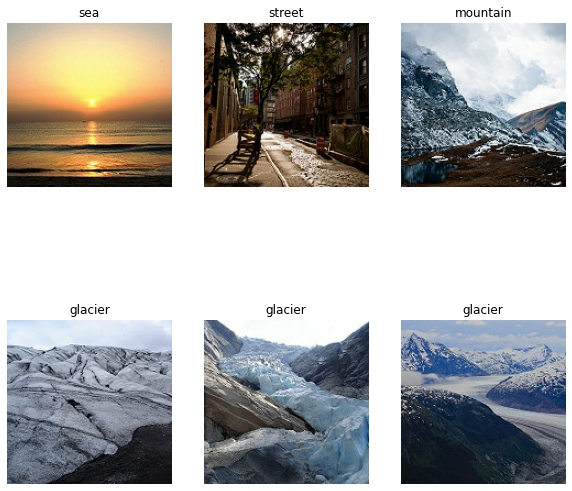

In [17]:
#Ploting some of images

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [18]:
#Checking size of images
for image, cap in train_ds.take(1):
    print(image.shape)
    print(cap.shape)
    break

#Checking size of images
for image, cap in val_ds.take(1):
    print(image.shape)
    print(cap.shape)
    break

(32, 150, 150, 3)
(32,)
(32, 150, 150, 3)
(32,)


**3- CNN**

In [45]:
#Applying convulution filters, pooling, flattening and activation 

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #1st layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #2nd layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #3rd layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #4th layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')                                                       
])


In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 conv2d_41 (Conv2D)          (None, 146, 146, 16)      2320      
                                                                 
 conv2d_42 (Conv2D)          (None, 144, 144, 16)      2320      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 72, 72, 16)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 72, 72, 16)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 70, 70, 32)        4640      
                                                      

In [47]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# import h5py

In [23]:
# erl_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
# mod_chk = ModelCheckpoint(filepath='/kaggle/working/my_model.hdf5', monitor='val_loss', save_best_only=True)
# lr_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1)

In [48]:
hist = model.fit(train_ds, shuffle=True, epochs=20, validation_data=val_ds, verbose=1)

Epoch 1/20
439/439 [==============================] - 28s 60ms/step - loss: 1.2887 - accuracy: 0.4530 - val_loss: 1.1046 - val_accuracy: 0.5040
Epoch 2/20
439/439 [==============================] - 25s 56ms/step - loss: 0.9850 - accuracy: 0.5863 - val_loss: 0.9190 - val_accuracy: 0.6380
Epoch 3/20
439/439 [==============================] - 24s 53ms/step - loss: 0.8500 - accuracy: 0.6607 - val_loss: 0.7804 - val_accuracy: 0.6947
Epoch 4/20
439/439 [==============================] - 27s 60ms/step - loss: 0.7929 - accuracy: 0.6889 - val_loss: 0.7784 - val_accuracy: 0.7013
Epoch 5/20
439/439 [==============================] - 23s 53ms/step - loss: 0.7401 - accuracy: 0.7124 - val_loss: 0.7083 - val_accuracy: 0.7373
Epoch 6/20
439/439 [==============================] - 24s 54ms/step - loss: 0.6923 - accuracy: 0.7346 - val_loss: 0.7026 - val_accuracy: 0.7443
Epoch 7/20
439/439 [==============================] - 23s 52ms/step - loss: 0.6482 - accuracy: 0.7584 - val_loss: 0.6425 - val_accuracy:

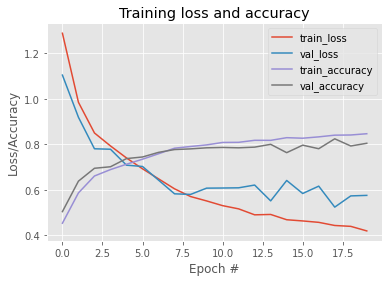

In [49]:
#Plotting losses and accuracy 
#'''LEARNING CURVE'''

import matplotlib.pyplot as plt
N = np.arange(0, 20)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, hist.history['loss'], label='train_loss')
plt.plot(N, hist.history['val_loss'], label='val_loss')
plt.plot(N, hist.history['accuracy'], label='train_accuracy')
plt.plot(N, hist.history['val_accuracy'], label='val_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [50]:
#Evaluating the model
acc = model.evaluate(val_ds, steps=len(val_ds), verbose=1)
print('%.2f'%(acc[1]*100))

94/94 [==============================] - 2s 23ms/step - loss: 0.5754 - accuracy: 0.8047
80.47


In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_ds,predpath = '/*.jpg')
print(cm)